<a href="https://colab.research.google.com/github/GuyAvni1/Final-Project-Guy-Ori/blob/main/All_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

df1 = pd.read_csv("/content/drive/MyDrive/df_prepared.csv")
data = df1
df2 = pd.read_csv("/content/drive/MyDrive/df_sds.csv")
array1 = df1['RID'].unique()
array2 = df2['RID'].unique()
diff_values = np.setdiff1d(array1, array2)
# my_list = diff_values
# string_values = [str(i) for i in my_list]
# print(string_values)



drop_rows = data[data['RID'].isin(diff_values)].index
# Use the drop() function to remove the rows from the DataFrame
data.drop(drop_rows, inplace=True)

# Save the modified DataFrame back to a CSV file
data.to_csv('df_prepared_new4.csv', index=True)
len(data['RID'].unique())
# files.download('df_prepared_new4.csv')

data

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,ABETA,ABETA_LowMidHigh,TAU,TAU_LowMidHigh,PTAU,PTAU_LowMidHigh,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,FSVERSION,IMAGEUID,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,Month_bl
21,4,022_S_0004,bl,22,ADNI1,ADNI1,08/11/2005,LMCI,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,NaN,1501.0,Mid,153.1,Mid,13.29,Mid,1.0,14.33,21.33,6.0,27.0,37.0,7.0,4.0,36.3636,4.0,25.0,271.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,64631.0,39605.0,6869.0,1154980.0,3983.0,19036.0,19615.0,1679440.0,MCI,0.0000
22,4,022_S_0004,m06,22,ADNI1,ADNI1,02/05/2006,LMCI,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,17.33,25.33,7.0,28.0,33.0,7.0,1.0,11.1111,NaN,24.0,141.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,64636.0,39726.0,6439.0,1116280.0,3711.0,17899.0,20139.0,1661130.0,MCI,5.7377
23,4,022_S_0004,m12,22,ADNI1,ADNI1,14/11/2006,LMCI,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,NaN,1176.0,Mid,159.7,Mid,13.30,Mid,1.0,15.00,22.00,7.0,26.0,37.0,4.0,1.0,12.5000,5.0,30.0,240.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,59357.0,38527.0,6451.0,1117390.0,3519.0,18691.0,19758.0,1656740.0,MCI,12.1639
24,4,022_S_0004,m18,22,ADNI1,ADNI1,14/05/2007,LMCI,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.33,28.33,7.0,27.0,44.0,8.0,2.0,16.6667,NaN,28.0,144.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,79178.0,40768.0,6373.0,1095210.0,3764.0,17862.0,18754.0,1648510.0,MCI,18.0984
25,4,022_S_0004,m30,22,ADNI1,ADNI1,08/05/2008,LMCI,67.5,Male,10,Hisp/Latino,White,Married,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16253,7000,035_S_7000,m12,35,ADNI3,ADNI3,23/09/2022,LMCI,89.5,Female,16,Hisp/Latino,NaN,Divorced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.67,31.67,8.0,26.0,18.0,6.0,5.0,83.3333,2.0,NaN,166.0,2.0,18.0,3.375,2.33333,1.66667,1.0,1.16667,1.25,1.97368,1.375,1.77778,2.0,1.8,1.16667,2.75,1.73684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCI,11.6066
16270,7015,126_S_7015,bl,126,ADNI3,ADNI3,30/11/2021,LMCI,77.1,Male,17,Not Hisp/Latino,White,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.67,13.67,5.0,28.0,33.0,4.0,4.0,50.0000,8.0,NaN,180.0,0.0,24.0,1.625,1.44444,1.00000,1.0,1.33333,2.00,1.39474,1.375,1.44444,1.0,1.0,1.33333,2.25,1.36842,NaN,Cross-Sectional FreeSurfer (6.0),1508611.0,74355.1,6854.4,1159970.0,3601.0,19023.0,22913.0,1679010.0,MCI,0.0000
16271,7015,126_S_7015,m12,126,ADNI3,ADNI3,15/11/2022,LMCI,77.1,Male,17,Not Hisp/Latino,White,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,13.67,19.67,4.0,28.0,37.0,5.0,5.0,55.5556,8.0,NaN,146.0,1.0,24.0,1.500,1.11111,1.16667,1.2,1.16667,1.50,1.26316,1.750,1.55556,1.0,1.0,1.00000,1.50,1.34211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCI,11.4754
16272,7016,019_S_7016,bl,19,ADNI3,ADNI3,25/10/2021,EMCI,66.1,Male,15,Not Hisp/Latino,Black,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
train_data = data[['APOE4', 'FDG', 'AV45', 'ABETA', 'TAU', 'PTAU', 'CDRSB', 'ADAS11',
                 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_forgetting',
                 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem',
                 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal',
                 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal',
                 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX']]
train_data.dropna(subset = ['DX'], inplace=True)
train_data

<ipython-input-15-231661cc6bd7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(subset = ['DX'], inplace=True)


,APOE4,FDG,AV45,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX
21,0.0,NaN,NaN,1501.0,153.1,13.29,1.0,14.33,21.33,6.0,27.0,37.0,4.0,36.3636,4.0,25.0,271.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39605.0,6869.0,1154980.0,3983.0,19036.0,19615.0,1679440.0,MCI
22,0.0,NaN,NaN,NaN,NaN,NaN,0.5,17.33,25.33,7.0,28.0,33.0,1.0,11.1111,NaN,24.0,141.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39726.0,6439.0,1116280.0,3711.0,17899.0,20139.0,1661130.0,MCI
23,0.0,NaN,NaN,1176.0,159.7,13.30,1.0,15.00,22.00,7.0,26.0,37.0,1.0,12.5000,5.0,30.0,240.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38527.0,6451.0,1117390.0,3519.0,18691.0,19758.0,1656740.0,MCI
24,0.0,NaN,NaN,NaN,NaN,NaN,1.0,20.33,28.33,7.0,27.0,44.0,2.0,16.6667,NaN,28.0,144.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40768.0,6373.0,1095210.0,3764.0,17862.0,18754.0,1648510.0,MCI
26,0.0,NaN,NaN,NaN,NaN,NaN,1.0,18.00,25.00,7.0,25.0,44.0,2.0,18.1818,3.0,29.0,230.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45254.0,6213.0,1085350.0,3052.0,18571.0,18934.0,1654340.0,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16253,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.67,31.67,8.0,26.0,18.0,5.0,83.3333,2.0,NaN,166.0,2.0,18.0,3.375,2.33333,1.66667,1.0,1.16667,1.25,1.97368,1.375,1.77778,2.0,1.8,1.16667,2.75,1.73684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCI
16270,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.67,13.67,5.0,28.0,33.0,4.0,50.0000,8.0,NaN,180.0,0.0,24.0,1.625,1.44444,1.00000,1.0,1.33333,2.00,1.39474,1.375,1.44444,1.0,1.0,1.33333,2.25,1.36842,74355.1,6854.4,1159970.0,3601.0,19023.0,22913.0,1679010.0,MCI
16271,NaN,NaN,NaN,NaN,NaN,NaN,1.5,13.67,19.67,4.0,28.0,37.0,5.0,55.5556,8.0,NaN,146.0,1.0,24.0,1.500,1.11111,1.16667,1.2,1.16667,1.50,1.26316,1.750,1.55556,1.0,1.0,1.00000,1.50,1.34211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCI
16272,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.33,12.33,6.0,28.0,27.0,7.0,87.5000,7.0,NaN,92.0,0.0,21.0,1.000,1.11111,1.16667,1.0,1.00000,1.25,1.07895,1.000,1.00000,1.0,1.0,1.00000,1.00,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MCI


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Load the CSV dataset
dataset = train_data

# Split the dataset based on the "DX" labels
cn_subset = dataset[dataset['DX'] == 'CN']
mci_subset = dataset[dataset['DX'] == 'MCI']
dementia_subset = dataset[dataset['DX'] == 'Dementia']

# # Calculate the mean MOCA score for each label group
# cn_mean_moca = cn_subset['MOCA'].mean()
# mci_mean_moca = mci_subset['MOCA'].mean()
# dementia_mean_moca = dementia_subset['MOCA'].mean()

# # Iterate over the dataset and fill missing values based on the label
# dataset.loc[(dataset['DX'] == 'CN') & dataset['MOCA'].isnull(), 'MOCA'] = cn_mean_moca
# dataset.loc[(dataset['DX'] == 'MCI') & dataset['MOCA'].isnull(), 'MOCA'] = mci_mean_moca
# dataset.loc[(dataset['DX'] == 'Dementia') & dataset['MOCA'].isnull(), 'MOCA'] = dementia_mean_moca



In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the CSV dataset
dataset = cn_subset

# Separate the features and labels
features = dataset.drop('DX', axis=1)
labels = dataset['DX']

# Create a new DataFrame to store the imputed values
imputed_features = features.copy()

# Identify columns with null values
null_columns = imputed_features.columns[imputed_features.isnull().any()].tolist()

# Iterate over the columns with null values
for column in null_columns:
    # Check if the column is categorical or numerical
    if imputed_features[column].dtype == 'object':
        # If the column is categorical, fill the null values with the mode
        imputed_features[column].fillna(imputed_features[column].mode()[0], inplace=True)
    else:
        # If the column is numerical, use KNN imputation to fill the null values
        imputer = KNNImputer(n_neighbors=5)
        imputed_values = imputer.fit_transform(imputed_features[[column]])
        imputed_features[column] = imputed_values

# Combine the imputed features and labels into a new dataset
cn_imputed_dataset = pd.concat([imputed_features, labels], axis=1)

In [ ]:
# Load the CSV dataset
dataset = mci_subset

# Separate the features and labels
features = dataset.drop('DX', axis=1)
labels = dataset['DX']

# Create a new DataFrame to store the imputed values
imputed_features = features.copy()

# Identify columns with null values
null_columns = imputed_features.columns[imputed_features.isnull().any()].tolist()

# Iterate over the columns with null values
for column in null_columns:
    # Check if the column is categorical or numerical
    if imputed_features[column].dtype == 'object':
        # If the column is categorical, fill the null values with the mode
        imputed_features[column].fillna(imputed_features[column].mode()[0], inplace=True)
    else:
        # If the column is numerical, use KNN imputation to fill the null values
        imputer = KNNImputer(n_neighbors=5)
        imputed_values = imputer.fit_transform(imputed_features[[column]])
        imputed_features[column] = imputed_values

# Combine the imputed features and labels into a new dataset
mci_imputed_dataset = pd.concat([imputed_features, labels], axis=1)


In [ ]:
# Load the CSV dataset
dataset = dementia_subset

# Separate the features and labels
features = dataset.drop('DX', axis=1)
labels = dataset['DX']

# Create a new DataFrame to store the imputed values
imputed_features = features.copy()

# Identify columns with null values
null_columns = imputed_features.columns[imputed_features.isnull().any()].tolist()

# Iterate over the columns with null values
for column in null_columns:
    # Check if the column is categorical or numerical
    if imputed_features[column].dtype == 'object':
        # If the column is categorical, fill the null values with the mode
        imputed_features[column].fillna(imputed_features[column].mode()[0], inplace=True)
    else:
        # If the column is numerical, use KNN imputation to fill the null values
        imputer = KNNImputer(n_neighbors=5)
        imputed_values = imputer.fit_transform(imputed_features[[column]])
        imputed_features[column] = imputed_values

# Combine the imputed features and labels into a new dataset
dementia_imputed_dataset = pd.concat([imputed_features, labels], axis=1)

In [ ]:
data = [cn_imputed_dataset, mci_imputed_dataset,dementia_imputed_dataset]
imputed_dataset = pd.concat(data)
imputed_dataset.to_csv('imputed_dataset.csv', index=False)
imputed_dataset.shape
# files.download('imputed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the CSV dataset
dataset = train_data

# Separate the features and labels
features = dataset.drop('DX', axis=1)
labels = dataset['DX']

# Create a new DataFrame to store the imputed values
imputed_features = features.copy()

# Identify columns with null values
null_columns = imputed_features.columns[imputed_features.isnull().any()].tolist()

# Iterate over the columns with null values
for column in null_columns:
    # Check if the column is categorical or numerical
    if imputed_features[column].dtype == 'object':
        # If the column is categorical, fill the null values with the mode
        imputed_features[column].fillna(imputed_features[column].mode()[0], inplace=True)
    else:
        # If the column is numerical, use KNN imputation to fill the null values
        imputer = KNNImputer(n_neighbors=5)
        imputed_values = imputer.fit_transform(imputed_features[[column]])
        imputed_features[column] = imputed_values

# Combine the imputed features and labels into a new dataset
imputed_dataset = pd.concat([imputed_features, labels], axis=1)

# Save the imputed dataset to a new CSV file
imputed_dataset.to_csv('imputed_dataset.csv', index=False)


In [ ]:
files.download('imputed_dataset.csv')

In [ ]:
# train_data.drop(columns=['DIGITSCOR'], axis = 1,inplace = True)
# train_data.dropna(subset = ['DX','Fusiform', 'MOCA','ABETA'], inplace=True)
imputed_dataset.dropna(subset = ['DX'], inplace=True)
print(imputed_dataset.isna().sum())
imputed_dataset.shape

APOE4                    0
FDG                      0
AV45                     0
ABETA                    0
TAU                      0
PTAU                     0
CDRSB                    0
ADAS11                   0
ADAS13                   0
ADASQ4                   0
MMSE                     0
RAVLT_immediate          0
RAVLT_forgetting         0
RAVLT_perc_forgetting    0
LDELTOTAL                0
DIGITSCOR                0
TRABSCOR                 0
FAQ                      0
MOCA                     0
EcogPtMem                0
EcogPtLang               0
EcogPtVisspat            0
EcogPtPlan               0
EcogPtOrgan              0
EcogPtDivatt             0
EcogPtTotal              0
EcogSPMem                0
EcogSPLang               0
EcogSPVisspat            0
EcogSPPlan               0
EcogSPOrgan              0
EcogSPDivatt             0
EcogSPTotal              0
Ventricles               0
Hippocampus              0
WholeBrain               0
Entorhinal               0
F

(8559, 41)

In [ ]:
train_data = imputed_dataset
columns = train_data.columns
for cols in columns:
  train_data[cols] = train_data[cols].replace(np.nan,0)
train_data.isna().sum()

APOE4                    0
FDG                      0
AV45                     0
ABETA                    0
TAU                      0
PTAU                     0
CDRSB                    0
ADAS11                   0
ADAS13                   0
ADASQ4                   0
MMSE                     0
RAVLT_immediate          0
RAVLT_forgetting         0
RAVLT_perc_forgetting    0
LDELTOTAL                0
DIGITSCOR                0
TRABSCOR                 0
FAQ                      0
MOCA                     0
EcogPtMem                0
EcogPtLang               0
EcogPtVisspat            0
EcogPtPlan               0
EcogPtOrgan              0
EcogPtDivatt             0
EcogPtTotal              0
EcogSPMem                0
EcogSPLang               0
EcogSPVisspat            0
EcogSPPlan               0
EcogSPOrgan              0
EcogSPDivatt             0
EcogSPTotal              0
Ventricles               0
Hippocampus              0
WholeBrain               0
Entorhinal               0
F

In [ ]:
print(train_data.shape)
values = train_data.drop(columns=['DX'], axis=1)
labels = train_data['DX']
train_data['DX'].value_counts()

(8559, 41)


MCI         4187
CN          3288
Dementia    1084
Name: DX, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(values, labels, test_size=0.3, stratify=labels)

In [ ]:
print("Number of train samples:" + str(len(X_train)))
print("Number of test samples:" + str(len(X_test)))

Number of train samples:5991
Number of test samples:2568


In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))


# **%%%%%%%%%%%%%%%SVC MODEL%%%%%%%%%%%%%%%%%**

In [ ]:
from sklearn.metrics import accuracy_score
model_svc = SVC() #Using SVC model
model_svc.fit(X_train,y_train) #Training
y_pred = model_svc.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred)))

Model accuracy: 0.9727414330218068


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          CN       0.84      0.89      0.86       679
    Dementia       0.84      0.78      0.81       173
         MCI       0.85      0.82      0.84       803

    accuracy                           0.84      1655
   macro avg       0.84      0.83      0.84      1655
weighted avg       0.84      0.84      0.84      1655



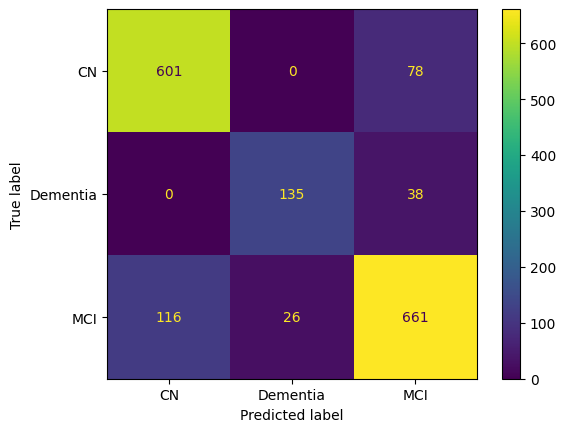

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = model_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_svc.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%LDA MODEL%%%%%%%%%%%%%%%%%**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_LDA = LinearDiscriminantAnalysis() #Using LDA model
model_LDA.fit(X_train,y_train) #Training
y_pred = model_LDA.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))
print(model_LDA.classes_)

Model accuracy: 0.8084592145015106
              precision    recall  f1-score   support

          CN       0.78      0.86      0.82       679
    Dementia       0.85      0.79      0.82       173
         MCI       0.83      0.77      0.80       803

    accuracy                           0.81      1655
   macro avg       0.82      0.81      0.81      1655
weighted avg       0.81      0.81      0.81      1655

['CN' 'Dementia' 'MCI']


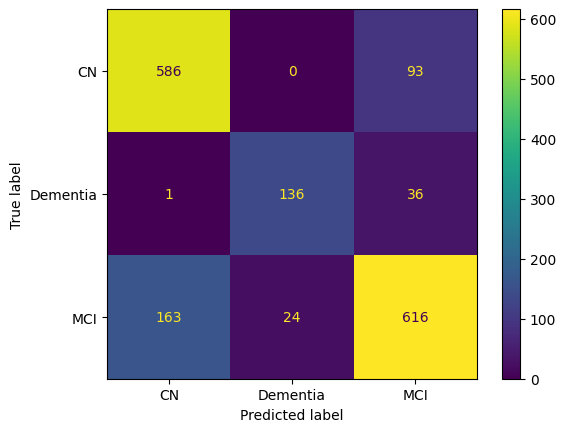

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = model_LDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_LDA.classes_)
disp.plot()

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_NBC = GaussianNB() #Using Naive Bayes Classifier model
model_NBC.fit(X_train,y_train) #Training
y_pred = model_NBC.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))
print(model_NBC.classes_)

Model accuracy: 0.7861027190332326
              precision    recall  f1-score   support

          CN       0.75      0.89      0.82       679
    Dementia       0.71      0.90      0.79       173
         MCI       0.86      0.67      0.75       803

    accuracy                           0.79      1655
   macro avg       0.77      0.82      0.79      1655
weighted avg       0.80      0.79      0.78      1655

['CN' 'Dementia' 'MCI']


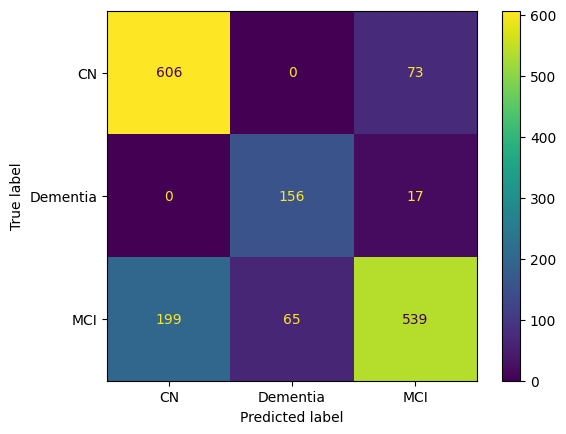

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = model_NBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_NBC.classes_)
disp.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model_RFC = RandomForestClassifier() #Using Naive Bayes Classifier model
model_RFC.fit(X_train,y_train) #Training
y_pred = model_RFC.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))
print(model_RFC.classes_)

Model accuracy: 0.8851963746223565
              precision    recall  f1-score   support

          CN       0.90      0.90      0.90       679
    Dementia       0.84      0.81      0.83       173
         MCI       0.88      0.89      0.88       803

    accuracy                           0.89      1655
   macro avg       0.88      0.87      0.87      1655
weighted avg       0.89      0.89      0.89      1655

['CN' 'Dementia' 'MCI']


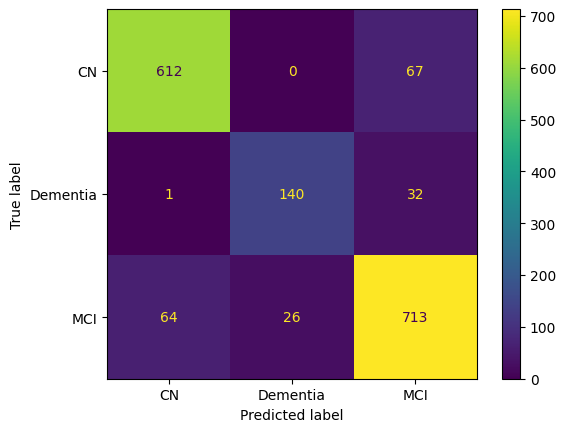

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC.classes_)
disp.plot()

In [ ]:
label_converter = {
    "CN": 0,
    "Dementia": 1,
    "MCI": 2

}

def convert_labels(labels):
    converted_labels = [label_converter[label] for label in labels]
    return converted_labels

y_train1 = convert_labels(y_train)
list(label_converter.values())

[0, 1, 2]

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train1 = convert_labels(y_train)
y_test1 = convert_labels(y_test)
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': 3,  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model = xgb.train(params, train_dmatrix, num_rounds)

# Make predictions on the testing set
y_pred = model.predict(test_dmatrix)
y_pred_labels = [round(value) for value in y_pred]  # convert probabilities to binary labels (0 or 1)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred)))
print(classification_report(y_test1,y_pred))
print(label_converter)

Model accuracy: 0.8858006042296073
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       679
           1       0.85      0.80      0.83       173
           2       0.88      0.89      0.88       803

    accuracy                           0.89      1655
   macro avg       0.88      0.87      0.87      1655
weighted avg       0.89      0.89      0.89      1655

{'CN': 0, 'Dementia': 1, 'MCI': 2}


{'CN': 0, 'Dementia': 1, 'MCI': 2}


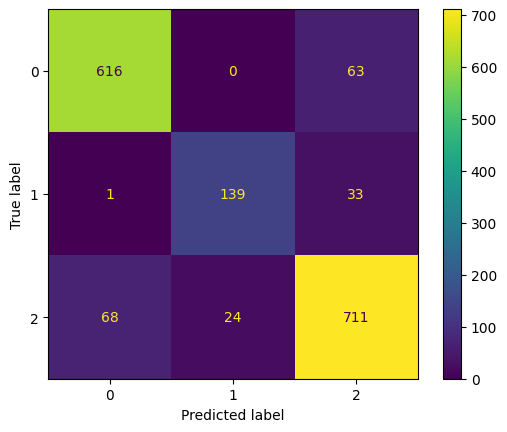

In [ ]:
print(label_converter)
cm = confusion_matrix(y_test1, y_pred, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()